In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [2]:
data = np.genfromtxt('testCsv.csv', delimiter=',', dtype=float, names=True)

In [3]:
data

array([(1.0, 1.0, 4.0, 1.0), (2.0, 2.0, 5.0, 1.0), (3.0, 1.0, 7.0, 1.0),
       (4.0, 2.0, 6.0, 1.0), (5.0, 1.0, 2.0, 1.0), (6.0, -1.0, 9.0, 0.0),
       (7.0, -2.0, 10.5, 0.0), (8.0, -1.0, 8.0, 0.0), (9.0, 0.0, 7.0, 0.0),
       (10.0, -5.0, 20.0, 0.0)], 
      dtype=[('No', '<f8'), ('x1', '<f8'), ('x2', '<f8'), ('y', '<f8')])

In [4]:
Y = data['y']
Y.astype(int)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [5]:
X = np.c_[data['x1'], data['x2']]
X.view()

array([[  1. ,   4. ],
       [  2. ,   5. ],
       [  1. ,   7. ],
       [  2. ,   6. ],
       [  1. ,   2. ],
       [ -1. ,   9. ],
       [ -2. ,  10.5],
       [ -1. ,   8. ],
       [  0. ,   7. ],
       [ -5. ,  20. ]])

In [6]:
clf = svm.SVC()
clf.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
clf.predict([[2, 3]])

array([ 1.])

In [8]:
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

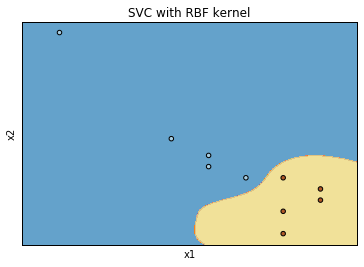

In [11]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('SVC with RBF kernel')
plt.show()